**Daniel Goings<br>
dcgoings@buffalo.edu<br>
MTH337 Project 2**

In [8]:
import math
import operator
import collections

## INTRODUCTION

In this project, we will identify severals ways of representing binary, decimal, and floating point numbers and standards, as well as functions, graphs, and equations to help reduce machine error and increase the precision of our numbers. We shall explore machine epsilon, which is the smallest floating point number that our machines can handle, discover the largest floating point number and its equivalent exponent that our machines are capable of, as well as binary to decimal and decimal to binary converstions, binary and decimal scientific notations and the IEEE 754 standards. Additionally, we will identify and utilize the Taylor series expansion to help reduce our loss of precision when handling incredibly small numbers, such as machine epsilon, and when it is valid and invalid to use for specific situations.

## PART 1

#### PROBLEM 1: Write a Python function $findEpsilon$ which finds the machine epsilon by determining the smallest floating point number larger than 1 that can be stored in the machine.

#### PSEUDOCODE:

    1. Assign variable n to our exponent, starting with 1
    2. Assign variable x to 2 to the power of negative n
    3. Implement while loop
        a. While 1 + our variable x does not equal 1:
        b. increment n by 1
        c. update variable x to new -n value
        d. update output variable
    4. While loop will finish when the machine cannot recognize a difference between 1+x and 1
    5. Return output containing 1-n (the exponent) and 2**(1-n) (the machine epsilon value)

In [25]:
def findEpsilon():
    """
    Returns the machine epsilon - spacing between 1 and the next represetable number.
    
    Keywords:
        out: pair of values - first one is the exponent of machine epsilon, 
        second one is the corresponding value in decimal notation
    """
    
    n = 1
    x = 2**(-n)
    
    #Keep reducing the exponent until we reach a value that is too small that the machine cannot tell
    # the difference between new and old values
    
    while 1 + x != 1:
        n += 1
        x = 2 ** (-n)
        out = 1-n, 2**(1-n)
        
    out = 1-n, 2**(1-n)
    return out

In [26]:
findEpsilon()

(-52, 2.220446049250313e-16)

#### PROBLEM 2: Write a Python function $findLargest$ which finds the largest floating point number that can be stored in the machine.

#### PSEUDOCODE:

    1. Assign variable n to our exponent, starting with 1
    2. Implement while loop with try/catch
        a. Try/Except allows us to continually run code until we run into an error
        b. When we run into an error from our 'Try' code, we will then execute some final code under 'Except'
    4. While we do not run into an error, assign x to 2^n+1
    5. When we run into an error, return the last valid value for n

In [109]:
def findLargest():
    """
    Returns the largest floating point number that can be stored on the machine
    
    Utilizes try and except to return the last value immediately after receiving an error 
    (i.e. going past the largest floating point number possible will trigger the error)
    
    In this function, we use a while loop, set 2 to the n'th power, where n = 1 and increments by 1 for each loop
    
    Output is a pair of values, first being the exponent for the largest floating point number,
    second is the corresponding value in decimal notation
    """
    
    n = 1
    
    while True:
        try:
            x = 2.**n
            n += 1
        except: 
            return (n-1, math.pow(2, n-1))

In [110]:
findLargest()

(1023, 8.98846567431158e+307)

#### PROBLEM 3: Print the base 2 exponent for both of these numbers

In [29]:
    """
    Fairly simple, we verify our results above by using the math.pow() function 
    and setting 2 to our output above 
    
    (i.e. 2 to the power of -52 in order to get our machine epsilon, and
          2 to the power of 1023 in order to get our largest floating point number)
    """

math.pow(2,-52)

2.220446049250313e-16

In [30]:
math.pow(2,1023)

8.98846567431158e+307

#### PROBLEM 4: Find the IEEE 754 representation of the numbers in the table. Pick any two integers for the last two rows. Then show that the results are correct using the Python built-in conversions for the binary and decimal types for at least one casae each for decimal to binary and binary to decimal.

| Decimal | Binary      | Scientific Notation | Sign Bit | Exponent | Mantissa |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 9       |             |                     |          |          |          |
|         | 101101      |                     |          |          |          |
| 25      |             |                     |          |          |          |
| 11.105  |             |                     |          |          |          |
|         | 10011.01101 |                     |          |          |          |
| 37      |             |                     |          |          |          |
| 301     |             |                     |          |          |          |

#### Binary $\rightarrow$ Decimal & Decimal $\rightarrow$ Binary

Using the table below, we can easily break decimal numbers down into 0's and 1's via powers of 2, and therefore converting the number into binary. Additionally, we can do the opposite by matching the 1's and 0's of a binary number below their respective slots.


| 128 | 64 | 32 | 16 | 8 | 4 | 2 | 1 |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |

For example, the number 9 can be broken down into $8 + 1$, and therefore, equal **1001** in binary.

| 128 | 64 | 32 | 16 | 8 | 4 | 2 | 1 |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 0 | 0 | 0 | 0 | **1** | 0 | 0 | **1** |

Similarly, the number **101101** in binary can be broken down the same way:

| 128 | 64 | 32 | 16 | 8 | 4 | 2 | 1 |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 0   | 0  | **1**  | 0  | **1** | **1** | 0 | **1** |

And therefore, $101101 = 32 + 8 + 4 + 1 = 45$

Using this method, we can now convert the remaining decimal numbers to binary.

The number 25 can be broken down into $16 + 8 + 1$, which equals **11001** in binary:

| 128 | 64 | 32 | 16 | 8 | 4 | 2 | 1 |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 0 | 0 | 0 | **1** | **1** | 0 | 0 | **1** |

The number 37 can be broken down into $32 + 4 + 1$, which equals **100101** in binary:

| 128 | 64 | 32 | 16 | 8 | 4 | 2 | 1 |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 0 | 0 | **1** | 0 | 0 | **1** | 0 | **1** |

The number 301 requires us to expand our table out to 256, allowing 301 to be broken down into $256 + 32 + 8 + 2 + 1$, which equals **100101101** in binary:

| 256 | 128 | 64 | 32 | 16 | 8 | 4 | 2 | 1 |
|:-------:|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| **1** | 0 | 0 | **1** | 0 | **1** | **1** | 0 | **1** |





In order to solve for the number **11.105**, we solve the 11 as normal, and then repeatedly multiply the right side of the decimal by 2 until we reach a zero remainder.

| 128 | 64 | 32 | 16 | 8 | 4 | 2 | 1 |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 0 | 0 | 0 | 0 | **1** | 0 | **1** | **1** |

$.105\, x\, 2\, =\, 0\, +\, .210$<br>
$.210\, x\, 2\, =\, 0\, +\, .420$<br>
$.420\, x\, 2\, =\, 0\, +\, .840$<br>
$.840\, x\, 2\, =\, 1\, +\, .680$<br>
$.680\, x\, 2\, =\, 1\, +\, .360$<br>
$.360\, x\, 2\, =\, 0\, +\, .720$<br>
$.720\, x\, 2\, =\, 1\, +\, .440$<br>
$.440\, x\, 2\, =\, 0\, +\, .880$<br>
$.880\, x\, 2\, =\, 1\, +\, .760$<br>
$.760\, x\, 2\, =\, 1\, +\, .520$<br>
$.520\, x\, 2\, =\, 1\, +\, .040$<br>
$.040\, x\, 2\, =\, 0\, +\, .080$<br>
$.080\, x\, 2\, =\, 0\, +\, .160$<br>
$.160\, x\, 2\, =\, 0\, +\, .320$<br>
$.320\, x\, 2\, =\, 0\, +\, .640$<br>
$.640\, x\, 2\, =\, 1\, +\, .280$<br>
$.280\, x\, 2\, =\, 0\, +\, .560$<br>
$.560\, x\, 2\, =\, 1\, +\, .120$<br>
$.120\, x\, 2\, =\, 0\, +\, .240$<br>
$.240\, x\, 2\, =\, 0\, +\, .480$<br>
$.480\, x\, 2\, =\, 0\, +\, .960$<br>
$.960\, x\, 2\, =\, 1\, +\, .920$<br>
$.920\, x\, 2\, =\, 1\, +\, .840$<br>
$.840\, x\, 2\, =\, 1\, +\, .680$ ...

Unfortunately, at this point, we can see that .105 has a non-terminating, repeating binary form. Since we already saw .840 and .680 remainders, this will continue the pattern.<br> This means we can record **11.105** as the following binary number: **1011.000110101110000101...**

In order to convert a decimal binary to decimal, such as **10011.01101** in our table, we solve our left side and right side of the decimal separately. We solve the left side as we have done multiple times already.

| 128 | 64 | 32 | 16 | 8 | 4 | 2 | 1 |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 0 | 0 | 0 | **1** | 0 | 0 | **1** | **1** |

For the fractional part, we fill our table first with **1/2**, and continue dividing by 2 (instead of multiplying by 2 like we did for the left side).

| 1/2 | 1/4 | 1/8 | 1/16 | 1/32 | 1/64 | 1/128 |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|
| 0 | **1** | **1** | 0 | **1** | 0 | 0 |

Adding the fractions, we get $.01101 = .25 + .125 + .03125 = .40625$

We can conclude that $10011.01101 = 19.40625$ and update our table.

| Decimal | Binary      | Scientific Notation | Sign Bit | Exponent | Mantissa |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 9       | 1001                              |                     |          |          |          |
| 45      | 101101                            |                     |          |          |          |
| 25      | 11001                             |                     |          |          |          |
| 11.105  | 1011.000110101110000101..         |                     |          |          |          |
| 19.40625| 10011.01101                       |                     |          |          |          |
| 37      | 100101                            |                     |          |          |          |
| 301     | 100101101                         |                     |          |          |          |

#### Scientific Notation

Scientific notation can be broken down into several steps:
    
    1. Move decimal until there is only one non-zero digit to the left of it
    2. Count the number of places you moved the decimal point
    3. If you moved the decimal to the left, the exponent is positive
        a. If you moved the decimal to the right, the exponent is negative
    4. Use the form: number x (10 ^ exponent)

For example, the decimal number 9 would keep the decimal place since 9 is the only non-zero digit to the left and we moved the decimal zero places (left or right).

$9 = 9\, x\, 10^ 0$

With our remaining whole numbers **45, 25, 37** and **301**, we move the decimal place to the left by one and increment the exponent by the same.

$45 = 4.5\, x\, 10^1$

$25 = 2.5\, x\, 10^1$

$37 = 3.7\, x\, 10^1$

$301 = 3.01\, x\, 10^2$

And finally, for our two decimals **11.105** and **19.40625**, we still move the decimal place to the left by one, increment the exponent, and re-write it.

$11.105 = 1.1105\, x\, 10^1$

$19.40625 = 1.940625\, x\, 10^1$

| Decimal | Binary      | Scientific Notation | Binary Scientific Notation | Sign Bit | Exponent | Mantissa |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 9       | 1001                              | $9\, x\, 10^ 0$       |          |          |          |          |
| 45      | 101101                            | $4.5\, x\, 10^1$      |          |          |          |          |
| 25      | 11001                             | $2.5\, x\, 10^1$      |          |          |          |          |
| 11.105  | 1011.000110101110000101..         | $1.1105\, x\, 10^1$   |          |          |          |          |
| 19.40625| 10011.01101                       | $1.940625\, x\, 10^1$ |          |          |          |          |
| 37      | 100101                            | $3.7\, x\, 10^1$      |          |          |          |          |
| 301     | 100101101                         | $3.01\, x\, 10^2$     |          |          |          |          |

Binary Scientific Notation is done a very similar way, with the exception being that we replace the 10 with a 2, but still count the decimal places the same. For example, **9** in binary is **1001**, and would be written as $1.001\, x\, 2^3$. We can now calculate the binary scientific notation for our remaining numbers:

$45 = 101101 = 1.01101\, x\, 2^5$

$25 = 11001 = 1.1001\, x\, 2^4$

$37 = 100101 = 1.00101\, x\, 2^5$

$301 = 100101101 = 1.00101101\, x\, 2^8$

$11.105 = 1011.000110101110000101 = 1.011000110101110000101\, x\, 2^3$

$19.40625 = 10011.01101 = 1.001101101\, x\, 2^4$

| Decimal | Binary      | Scientific Notation | Binary Scientific Notation | Sign Bit | Exponent | Mantissa |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 9       | 1001                              | $9\, x\, 10^ 0$       | $1.001\, x\, 2^3$         |          |          |          |
| 45      | 101101                            | $4.5\, x\, 10^1$      | $1.01101\, x\, 2^5$          |          |          |          |
| 25      | 11001                             | $2.5\, x\, 10^1$      | $1.1001\, x\, 2^4$         |          |          |          |
| 11.105  | 1011.000110101110000101..         | $1.1105\, x\, 10^1$   | $1.011000110101110000101x2^3$         |          |          |          |
| 19.40625| 10011.01101                       | $1.940625\, x\, 10^1$ | $1.001101101\, x\, 2^4$         |          |          |          |
| 37      | 100101                            | $3.7\, x\, 10^1$      | $1.00101\, x\, 2^5$         |          |          |          |
| 301     | 100101101                         | $3.01\, x\, 10^2$     | $1.00101101\, x\, 2^8$         |          |          |          |

#### Floating Point Representation

Now for the fun part! Using the information provided from the binary scientific notation, we can solve the remaining sign bit, exponent, and mantissa for our values.  While floating point representation can utilize both single and double precision formats (32 vs 64-bits), for the purpose of this research project we will limit ourselves to 32-bit. These three items, sign bit, exponent, and mantissa, make up the overall 32-bit notation of a number.


#### Sign Bit
Starting with the sign bit, this is one bit long and is used to indicate whether our number is positive or negative. If the number is positive, the sign bit is 0. If the number is negative, the sign bit is 1. Since all of our numbers are positive, all of our sign bits for this exercise are 0.

| Decimal | Binary      | Scientific Notation | Binary Scientific Notation | Sign Bit | Exponent | Mantissa |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 9       | 1001                  | $9\, x\, 10^ 0$       | $1.001\, x\, 2^3$            | 0 |          |          |
| 45      | 101101                | $4.5\, x\, 10^1$      | $1.01101\, x\, 2^5$          | 0 |          |          |
| 25      | 11001                 | $2.5\, x\, 10^1$      | $1.1001\, x\, 2^4$           | 0 |          |          |
| 11.105  | 1011.000110101110000101.. | $1.1105\, x\, 10^1$   | $1.011000110101110000101x2^3$| 0 |      |          |
| 19.40625| 10011.01101           | $1.940625\, x\, 10^1$ | $1.001101101\, x\, 2^4$      | 0 |          |          |
| 37      | 100101                | $3.7\, x\, 10^1$      | $1.00101\, x\, 2^5$          | 0 |          |          |
| 301     | 100101101             | $3.01\, x\, 10^2$     | $1.00101101\, x\, 2^8$       | 0 |          |          |

#### Exponent
For the exponent column, this will be represented by eight bits and is calculated by taking the the exponent given in binary scientific notation and adding it to 127. This number is then converted to binary and represents the exponent portion of our table. 

For example, decimal number 9 in binary scientific notation is represented by $2^3$, and therefore, an exponent of 3. Added to 127, we are given 130, which equals 10000010 in binary. This equals our exponent. Since all of our exponents in binary scientific notation are either a 3, 4, 5 or 8, we only need to solve those four.

| BSN | Exponent | +127 | Binary |
|:---------------:|:--------:|:----:|:------:|
| $2^3$ | 3 | 130 | 10000010 |
| $2^4$ | 4 | 131 | 10000011 |
| $2^5$ | 5 | 132 | 10000100 |
| $2^8$ | 8 | 135 | 10000111 |

| Decimal | Binary      | Scientific Notation | Binary Scientific Notation | Sign Bit | Exponent | Mantissa |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 9       | 1001                  | $9\, x\, 10^ 0$       | $1.001\, x\, 2^3$            | 0 | 10000010 |          |
| 45      | 101101                | $4.5\, x\, 10^1$      | $1.01101\, x\, 2^5$          | 0 | 10000100 |          |
| 25      | 11001                 | $2.5\, x\, 10^1$      | $1.1001\, x\, 2^4$           | 0 | 10000011 |          |
| 11.105  | 1011.000110101110000101.. | $1.1105\, x\, 10^1$   | $1.011000110101110000101x2^3$| 0 |10000010|          |
| 19.40625| 10011.01101           | $1.940625\, x\, 10^1$ | $1.001101101\, x\, 2^4$      | 0 | 10000011 |          |
| 37      | 100101                | $3.7\, x\, 10^1$      | $1.00101\, x\, 2^5$          | 0 | 10000100 |          |
| 301     | 100101101             | $3.01\, x\, 10^2$     | $1.00101101\, x\, 2^8$       | 0 | 10000111 |          |

#### Mantissa

Solving for the mantissa is our final piece of the puzzle. The mantissa is 23-bits long and refers to the remaining numerical information to the left of the $2^x$ term. In order to calculate the mantissa, we simply take all of the digits to the right of the decimal and add trailing zeros to make up the remaining 23 missing bits. 

For example, decimal number 9 in binary scientific notation begins with **1.001**, so we simply take the digits to the right of the decimal, 001, and this represents the first three digits of the mantissa. We then fill the remaining bits with 0's. Therefore, our mantissa for the decimal number 9 is equal to 00100000000000000000000.

| Right of the decimal point | With trailing zeros |
|:--------------------------:|:-------------------:|
| 01101                      | 01101000000000000000000 |
| 1001                       | 10010000000000000000000 |
| 011000110101110000101      | 01100011010111000010100 |
| 001101101                  | 00110110100000000000000 |
| 00101                      | 00101000000000000000000 |
| 00101101                   | 00101101000000000000000 |

#### Finished Table

| Decimal | Binary      | Scientific Notation | Binary Scientific Notation | Sign Bit | Exponent | Mantissa |
|:-------:|:-----------:|:-------------------:|:--------:|:--------:|:--------:|
| 9       | 1001                  | $9\, x\, 10^ 0$       | $1.001\, x\, 2^3$            | 0 | 10000010 | 00100000000000000000000 |
| 45      | 101101                | $4.5\, x\, 10^1$      | $1.01101\, x\, 2^5$          | 0 | 10000100 | 01101000000000000000000 |
| 25      | 11001                 | $2.5\, x\, 10^1$      | $1.1001\, x\, 2^4$           | 0 | 10000011 | 10010000000000000000000 |
| 11.105  | 1011.000110101110000101.. | $1.1105\, x\, 10^1$   | $1.011000110101110000101x2^3$| 0 |10000010| 01100011010111000010100 |
| 19.40625| 10011.01101           | $1.940625\, x\, 10^1$ | $1.001101101\, x\, 2^4$      | 0 | 10000011 | 00110110100000000000000 |
| 37      | 100101                | $3.7\, x\, 10^1$      | $1.00101\, x\, 2^5$          | 0 | 10000100 | 00101000000000000000000 |
| 301     | 100101101             | $3.01\, x\, 10^2$     | $1.00101101\, x\, 2^8$       | 0 | 10000111 | 00101101000000000000000 |

#### Verification

As instructed, we shall now verify a few cases of each bin-to-dec and dec-to-bin conversions using built-in Python functions.

In [31]:
# Converts binary integer to base 10 integer

print('1001 in binary is equal to %s in decimal.' % (int('1001', base=2)))
print('101101 in binary is equal to %s in decimal.' % (int('101101', base=2)))

1001 in binary is equal to 9 in decimal.
101101 in binary is equal to 45 in decimal.


In [32]:
# Convert base 10 integer to binary integer

print('9 in decimal is equal to %s in binary.' % (bin(9)))
print('45 in decimal is equal to %s in binary.' % (bin(45)))

9 in decimal is equal to 0b1001 in binary.
45 in decimal is equal to 0b101101 in binary.


#### EXTRA: What about zero? How is the number zero displayed in floating point representation?

Zero is considered a "special case", in which every bit is 0 with the sign bit being irrelevant; meaning we can technically get +0 and -0 by assigning the sign bit as 0 or 1, respectively, with all remaining numbers (in the exponent and mantissa) set to zero!

#### EXTRA: So zero is represented by a zero exponent, how do you represent the number $1.0\, x\, 2 ^ 0$?!

In this case, you must recall that there is another way to obtain zero for an exponent. Working backwards, instead of adding 127 to our exponent, we now subtract 127 from the exponent. For example, if we were to assign our exponent to 127 (i.e. $01111111$), when we subtract 127 from 127, we get a zero exponent without explicitly writing $00000000$ as our exponent! This is how we get a zero exponent in the notation for $1.0\, x \, 2^0$.

#### Integer to IEEE 754 Python Function

As a little extra, using all of the information given above, we can create a quick function that will return the sign bit, exponent, and mantissa for a given **base 10 integer**.

#### PSEUDOCODE:

    1. Assign variable 'result' that holds all three values of sign bit, exponent, and mantissa
    2. Calculate sign bit
        a. Convert our integer to string, check first char
        b. If first char is a digit --> Integer is positive --> Sign bit is 0
        c. If first char is a '-' --> Integer is negative --> Sign bit is 1
        d. Add sign bit to 'result'
    3. Calculate exponent
        a. How to calculate exponent was discussed previously while filling out the table (length of binary - 1 + 127).
        b. Use bin() and slice functions to retrieve correct values for the exponent
        c. Convert this exponent to binary
        d. Add exponent to 'result'
    4. Calculate mantissa
        a. How to calculate mantissa was discussed previously while filling out the table (all numbers right of leading 1 + 
            trailing zeros)
        b. While the length of the mantissa is < 23 digits, add trailing zeros
        c. Add mantissa to result
    5. Join all values in list 'result' and return

In [182]:
"""
Using the functions sign_bit() and exp_mantissa(), 
we can easily convert an integer to IEEE 754 floating point representation.

Keywords: 
    result: a list to keep track of the sign bit, exponent, and mantissa as they are calculated
    num_str: convert our integer to string for easier manipulation
    bit: our final sign bit value
    exponent: our final exponent value
    bin_exponent: our final exponent value in binary form
    mantissa: our final mantissa value, with and without trailing zeros
    binary: binary representation of our number, 
        typically coupled with slicing in order to remove the '0b' at the beginning of each conversion
    
"""

result = []

def sign_bit(num):
    print("Converting integer %s to IEEE 754 format" % num)
    
    # converts our integer value to a string
    num_str = str(num)
    
    # since we have converted our integer to a string, we can easily check if the number is positive or negative by
    #    looking at the first char in the string (i.e. digit vs '-')
    
    if num_str[0] != '-':
        bit = '0'
        print("Sign Bit: %s" % bit)
        result.append(bit)
        return bit
    
    else:
        bit = '1'
        print("Sign Bit: %s" % bit)
        result.append(bit)
        return bit
    
def exp_mantissa(num):
    
    # checks whether our value is negative or positive, which will tell us how many indexes we need to slice
    #    when converting our number to binary (i.e. '0b' vs '-0b')
    if sign_bit(num) == '0': 
        binary = (bin(num)[2:])
    else: 
        binary = (bin(num)[3:])
    
    # calculate the exponent in decimal by adding the 127 bias
    #    then calculate the 8-bit exponent through binary conversion
    exponent = len(binary) - 1 + 127
    bin_exp = (bin(exponent)[2:])
    print("Exponent in decimal: %s" % exponent)
    print("Exponent in binary: %s" % bin_exp)
    result.append(bin_exp)
    
    # calculate the 23-bit mantissa by removing/slicing the leading 1
    mantissa = list(binary[1:])
    
    # add trailing zeros until mantissa length = 23
    while len(mantissa) < 23:
        mantissa.append('0')
        
    mantissa = ''.join(mantissa)
    print("Mantissa: %s" % mantissa)
    result.append(mantissa)
    
    print("Result: %s" % result)
    
    # join all values in our 'result' list in order to get the final IEEE 754 representation
    ieee754 = ''.join(result)
    print("Final answer: %s" % ieee754)
    
exp_mantissa(43432)

Converting integer 43432 to IEEE 754 format
Sign Bit: 0
Exponent in decimal: 142
Exponent in binary: 10001110
Mantissa: 01010011010100000000000
Result: ['0', '10001110', '01010011010100000000000']
Final answer: 01000111001010011010100000000000


## BONUS FUNCTIONS: Binary -> Decimal, Decimal -> Binary, and Binary Adder

#### Binary $\rightarrow$ Decimal Function

#### PSEUDOCODE:

    1. Assign variable 'result' to add our answer to
    1. Convert binary number from integer to string
    2. Convert string containing binary number to list
    3. Reverse list containing string
    4. List indices exactly match values required for binary to decimal conversion
        a. example: at index 5, 1 * 2^5 = 32
    5. Implement for loop that iterates through list containing our string
        a. With knowledge of #4, we can iterate through our list and retrieve the values assigned to each digit
        b. Add each iteration to 'result'
    6. Return 'result'

In [34]:
def bin2dec(n):
    """
    Converts an integer value from binary to decimal
    
    Keywords:
        result: our final integer value
        temp: string representation of our binary number
        binList: list representation of our 'temp' string
    """
    
    result = 0
    temp = str(n)

    # converts the string representation of our number to a list, then reverses it
    binList = [i for i in temp]
    print("List form: %s" % binList)
    binList.reverse()

    # since we reversed our string, our index value exactly matches the appropriate power needed for the conversion
    #    i.e. at index 5, 1*2^5 = 32
    # continually add calculations to result
    
    for x in range(0, len(binList)):
        result += (2**x) * int(binList[x])
        
    print("%s in decimal is %s" % (n, result))

bin2dec('101100')

List form: ['1', '0', '1', '1', '0', '0']
101100 in decimal is 44


#### Decimal $\rightarrow$ Binary Function

#### PSEUDOCODE:

    1. Assign variable 'binList' to empty list
        a. This list will contain our final binary representation of our number
    2. Assign variable 'temp' to our decimal number
    3. While temp is greater than 0
        a. Append the remainder from temp mod 2 to binList
        b. Update temp value to temp / 2
        c. Continue until temp is not greater than 0
    5. Reverse our list containing our binary number since the binary numbers are added in reverse
    6. Join and return 'result'

In [35]:
def dec2bin(n):
    """
    Converts an integer value from decimal to binary by continually dividing our number by 2 and adding the remainder to
    our result as long as the number is greater than 0.
    
    Keywords:
        result: our final binary value
        temp: temporary variable for our integer
        binList: list representation of our binary number
    """
    binList = []
    temp = n

    # while our number is greater than zero, append the answer of our num mod 2, and update our temp variable
    while temp > 0:
        binList.append(temp%2)
        temp = temp//2
        
    # since the above gives us our result in the opposite direction, we must reverse and then join the list for our answer
    
    temp = binList[::-1]
    result = (''.join(str(n) for n in temp))
    print("%s in binary is %s" % (n, result))
    print("List form: %s" % temp)
    print("Verify using built-in python binary function: %s" % (bin(n)))
    
dec2bin(44)

44 in binary is 101100
List form: [1, 0, 1, 1, 0, 0]
Verify using built-in python binary function: 0b101100


#### Binary Addition Function

#### PSEUDOCODE:

    1. Setup and verification code not included in pseudocode, see below
    2. Assign variables to track our carry integer and result list
    3. Store both binary strings as lists; store length of lists as ints
    4. Compare lengths of our list containing our binary strings
        a. Insert leading zeros into the shorter list so that the lengths are equal
    5. Reverse lists to assist in addition
    6. Implement if/elif statements for each possible outcome of adding our binary string indices and carry value
        a. Only four possible outcomes: all three numbers can only equal 0, 1, 2, or 3
        b. Append sum to result, update carry accordingly
    7. Undo reverse of our result
    8. Remove leading zeros
    9. Return result

In [181]:
def adder(binary1, binary2):
    
    """
    Adds two binary strings together by converting to a list, adding leading zeros to match lengths to assist in addition,
     reverse the lists and continue to the addition. 
      
    Only four sums are possible when adding binary strings together: 0, 1, 2 or 3. We use this information to implement
      if and elif statements to obtain our result and update the carry values
      
    The first portion of this code is used to set up and verify our problem and our expected results.
     The actual implementation of our binary adder does not utilize this information in any way, and we do not use any
     built-in functions that directly assist in the conversion between binary to decimal or vice versa.
    
    Keywords:
        carry: variable that keeps track of our carry when our binary addition is (1+1) or (1+1+1)
        result: list variable that contains our final sums
        bin_list1: list containing our first binary string
        bin_list2: list containing our second binary string
        bin_len1: variable storing the length of our first binary string
        bin_len2: variable storing the length of our second binary string
    """
    
    ### THE BELOW CODE AND PRINT STATEMENTS ARE FOR SETUP AND VERIFICATION PURPOSES ONLY ###
    
    bin1_to_dec = int(binary1, base=2)
    bin2_to_dec = int(binary2, base=2)
    sum_to_dec = bin1_to_dec + bin2_to_dec
    sum_in_bin = bin(sum_to_dec)
    
    print("-----")
    print("We are given the following two binary strings: %s and %s" % (binary1, binary2))
    print("In base 10, these numbers equal %s and %s and when added together equal %s" % 
          (bin1_to_dec, bin2_to_dec, sum_to_dec))
    print("Using this binary adder, we should expect our result to equal %s\n" % sum_in_bin[2:])
    
    ### END OF SETUP AND VERIFICATION ###
    
    # carry tracker and result variables
    
    carry = 0
    result = []
    
    # convert our binary strings to lists and create length variables for our lists
    
    bin_list1 = [i for i in binary1]
    bin_len1 = len(bin_list1)    
    
    bin_list2 = [i for i in binary2]
    bin_len2 = len(bin_list2)
    
    # check which string is longer 
    # insert leading zeros to the shorter binary string to assist with addition
    
    if bin_len1 < bin_len2:
        while len(bin_list1) < len(bin_list2):
            bin_list1.insert(0, '0')
    
    elif bin_len2 < bin_len1:
        while len(bin_list2) < len(bin_list1):
            bin_list2.insert(0, '0')
            
    # reverse lists to assist with addition from left to right instead of right to left
    
    bin_list1.reverse()
    bin_list2.reverse()
    
    # iterate through the length of our binary strings
    # implement four if/elif statements, one for each possible outcome when adding our binary numbers
    # only possible outcomes are sums of 0, 1, 2, or 3; append outcomes to result, update carry variables accordingly
    
    for x in range(0, len(bin_list1)):
        if (int(bin_list1[x]) + int(bin_list2[x]) + carry == 0):
            result.append('0')
            
        elif (int(bin_list1[x]) + int(bin_list2[x]) + carry == 1):
            result.append('1')
            carry = 0
            
        elif (int(bin_list1[x]) + int(bin_list2[x]) + carry == 2):
            result.append('0')
            carry = 1
            
        elif (int(bin_list1[x]) + int(bin_list2[x]) + carry == 3):
            result.append('1')
            carry = 1
            
    # undo our earlier reverse function, eliminate leading zeros, and join our 'result'
            
    result.reverse()
    
    while result[0] == '0':
        result = result[1:]
    
    result = ''.join(result)
    
    print("The result from our binary adder is %s" % result)
    print("Verified by built-in function, %s equals %s\n" % (result, int(result, base=2)))
    
#testcases
adder('111111', '0011011')
adder('110000', '1')
adder('000110', '100110')
adder('0', '1')

-----
We are given the following two binary strings: 111111 and 0011011
In base 10, these numbers equal 63 and 27 and when added together equal 90
Using this binary adder, we should expect our result to equal 1011010

The result from our binary adder is 1011010
Verified by built-in function, 1011010 equals 90

-----
We are given the following two binary strings: 110000 and 1
In base 10, these numbers equal 48 and 1 and when added together equal 49
Using this binary adder, we should expect our result to equal 110001

The result from our binary adder is 110001
Verified by built-in function, 110001 equals 49

-----
We are given the following two binary strings: 000110 and 100110
In base 10, these numbers equal 6 and 38 and when added together equal 44
Using this binary adder, we should expect our result to equal 101100

The result from our binary adder is 101100
Verified by built-in function, 101100 equals 44

-----
We are given the following two binary strings: 0 and 1
In base 10, these 

## PART 2

In part two, we will quantify errors in calculating values of functions that are error prone due to the limits of machine precision. As demonstrated in class, we will plot the function $ g(x) = \frac{log(1+x)}{x}$ for different ranges of $x$. Below, we will look at $1e-1$, $1e-7$, and $1e-15$ (approaching machine epsilon) in order to show how machine precision becomes an issue as we approach zero.

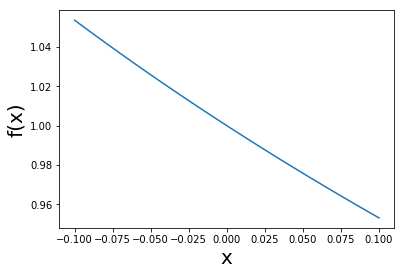

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

end = 1e-1
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.plot(x, y)

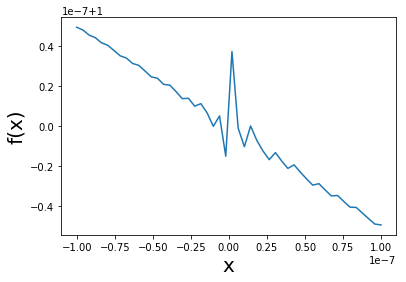

In [37]:
end = 1e-7
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.plot(x, y)

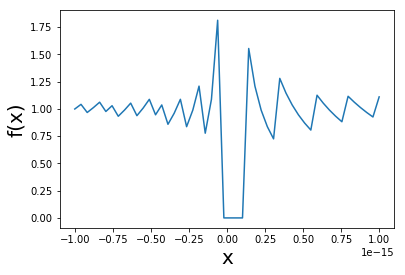

In [38]:
end = 1e-15
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.plot(x, y)

**PROBLEM 1:** What happens if you decrease $x$ to magnitudes comparable to machine episilon?

**ANSWER:** As shown above, it is likely that as we approach zero with such a small number such as $1e-15$, the machine is unable to process the difference between zero and our current value. As a result, the machine still treats the number as zero until it reaches a threshold where it can finally process the number as greater than zero.

#### PROBLEM 2: Write down the Taylor expansion for this function to 5th order while explicitly showing your calculations.

The Taylor expansion of a function $f(x)$ is given as 

$$f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + ...  \frac{f^{(n)}(0)}{n!}x^n + \frac{f^{n+1}(0)}{(n+1)!}x^{n+1},$$

Continuing from where we left off in class with the Taylor expansion, for the function:

$$f(x) = \log(1+x),$$ the derivatives are given as:

$$f'(x) = \frac{1}{1+x}$$
$$f''(x) = -\frac{1}{(1+x)^2}$$
$$f'''(x) = \frac{2}{(1+x)^3}$$
$$f''''(x) = -\frac{6}{(1+x)^4}$$

We can now solve for the 5th derivative:

$$f'''''(x) = \frac{24}{(1+x)^5}$$

With this information, we can now update the values when $x=0$:

$$f(0) = 0$$
$$f'(0) = 1$$
$$f''(0) = -1$$
$$f'''(0) = 2$$
$$f''''(0) = -6$$
$$f'''''(0) = 24$$

We can also update the complete Taylor series $f(x)$ and our function $g(x)$:

$$f(x) = \log(1+x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \frac{x^5}{5}$$

and therefore..

$$g(x) = \frac{\log(1+x)}{x} = 1 - \frac{x}{2} + \frac{x^2}{3} - \frac{x^3}{4} + \frac{x^4}{5}$$

**PROBLEM 4:** Use the Taylor series expansion to calculate how big $x$ can be while maintaining an error of less than or equal to $10^{-16}$.

**ANSWER:** With the new information provided above, we can now use the 5th order in our Taylor series to calculate the maximum value of error.

$$T_5 = \frac{x^4}{5}$$

In order to solve for machine error i.e. $T_5 \approx 10^{-16}$, we solve:

$$\frac{x^4}{5} = 10^{-16} \, \, \, \rightarrow \, \, \, \text{Multiply both sides by 5 and take the 4th root} \, \, \,
\rightarrow \, \, \, x \approx 1.495 \times 10^{-4}.$$

Compared to using only 4th order Taylor series, the 5th order has higher accuracy to two more decimal places. With the 5th order, $x$ can be approximately $1.495 \times 10^{-4}$ while maintaining an error of less than or equal to $10^{-16}.$


**PROBLEM 3:** Compare the two versions of g(x) -- the Taylor expansion and the actual function. When is th expansion valid? When is it not valid? Why?

C:\Users\dcg47\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


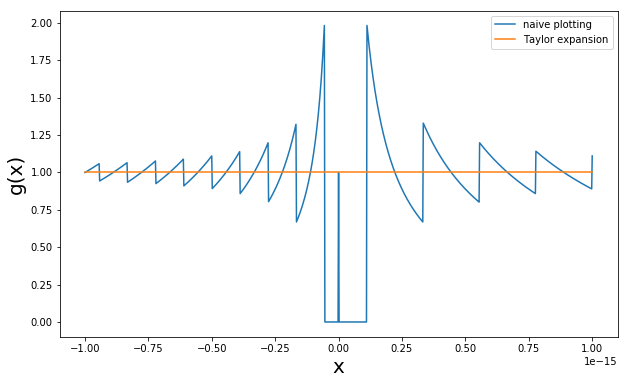

In [39]:
plt.figure(figsize=(10, 6))
end = 1e-15
x = np.linspace(-end, end, 1001)
y = np.where(x==0, 1.0, np.log(1+x)/x)
z = 1 -x/2 + x*x/3 - x*x*x/4 + (x*x*x*x/5)
plt.xlabel('x', fontsize=20)
plt.ylabel('g(x)', fontsize=20)
plt.plot(x, y, label= 'naive plotting')
plt.plot(x, z, label = 'Taylor expansion')
plt.legend()

C:\Users\dcg47\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\dcg47\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


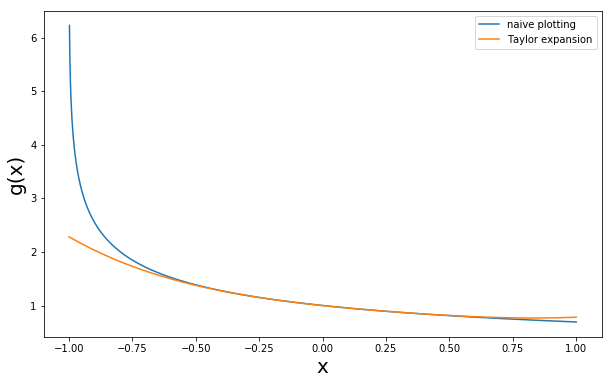

In [40]:
plt.figure(figsize=(10, 6))
end = 1
x = np.linspace(-end, end, 1001)
y = np.where(x==0, 1.0, np.log(1+x)/x)
z = 1 -x/2 + x*x/3 - x*x*x/4 + (x*x*x*x/5)
plt.xlabel('x', fontsize=20)
plt.ylabel('g(x)', fontsize=20)
plt.plot(x, y, label= 'naive plotting')
plt.plot(x, z, label = 'Taylor expansion')
plt.legend()

C:\Users\dcg47\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\dcg47\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
C:\Users\dcg47\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


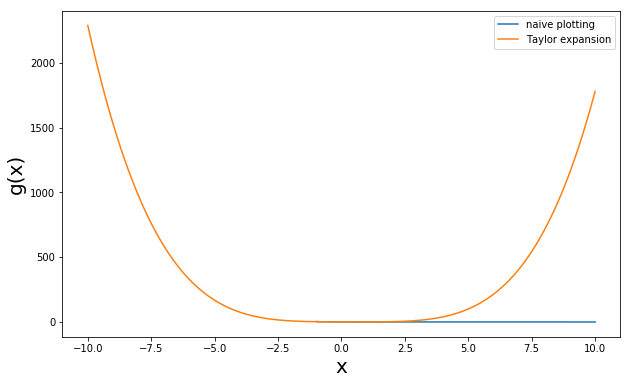

In [41]:
plt.figure(figsize=(10, 6))
end = 10
x = np.linspace(-end, end, 1001)
y = np.where(x==0, 1.0, np.log(1+x)/x)
z = 1 -x/2 + x*x/3 - x*x*x/4 + (x*x*x*x/5)
plt.xlabel('x', fontsize=20)
plt.ylabel('g(x)', fontsize=20)
plt.plot(x, y, label= 'naive plotting')
plt.plot(x, z, label = 'Taylor expansion')
plt.legend()

**ANSWER:** Observing the above three graphs we can see quite a few differences between the original function and our new Taylor series expansion. It would appear that the Taylor series expansion becomes more valid and hugs zero better than the normal function at smaller x values, but then diverts drastically outside of that range. In the most recent two graphs, just showing $end = 1$ and $end = 10$, we can already see that the Taylor series goes parabolic as $x \rightarrow \infty$. At higher values, the Taylor series becomes less valid since we do not require such a high order for the series.

## CONCLUSION

Throughout this project, we have successfully learned different ways and shortcuts for identifying binary, decimal, and floating numbers, and have calculated unique machine-specific numbers such as machine epsilon and the largest floating point number that Python is capable of handing. Additionally, we successfully implemented built-in Python and imported NumPy functions and capabilities in order to graph our base function and Taylor series implementation of the same function, revealing to us both of their limitations, advantages and disadvantages in our pursuit of reducing machine error and loss of precision of numerical values. We are now able to recognize the significance of the Taylor series expansion, how it assists with very small values and its drawbacks with larger values.

## SOURCES

https://www.h-schmidt.net/FloatConverter/IEEE754.html<br>
https://www.rapidtables.com/convert/number/decimal-to-binary.html<br>
https://www.calculatorsoup.com/calculators/math/scientific-notation-converter.php<br>
Class Notes / Professor's Notes